In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [8]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
train_images = train_images / 255.0
test_images = test_images /255.0

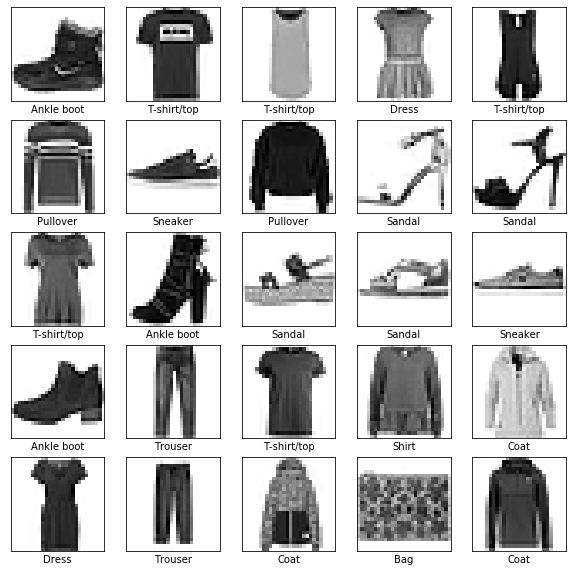

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_name[train_labels[i]])
plt.show()

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [18]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [22]:
model.fit(train_images, train_labels, epochs=50)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3438 - accuracy: 0.8788
Epoch 2/50
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3419 - accuracy: 0.8782
Epoch 3/50
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3399 - accuracy: 0.8788
Epoch 4/50
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3381 - accuracy: 0.8803
Epoch 5/50
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3362 - accuracy: 0.8809
Epoch 6/50
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3344 - accuracy: 0.8809
Epoch 7/50
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3326 - accuracy: 0.8810
Epoch 8/50
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3308 - accuracy: 0.8821
Epoch 9/50
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3285 - accuracy: 0.8822
Epoch 10/50
60

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n test accuracy:', test_acc)

10000/1 - 1s - loss: 48.2823 - accuracy: 0.7856

 test accuracy: 0.7856


In [29]:
predictions = model.predict(test_images)

In [30]:
predictions[0]
np.argmax(predictions[0])

9

In [33]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],
                                100*np.max(predictions_array),
                                class_name[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

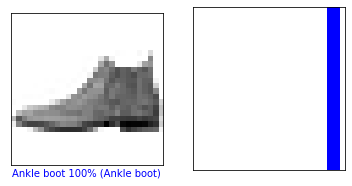

In [34]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

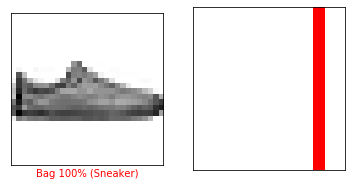

In [35]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

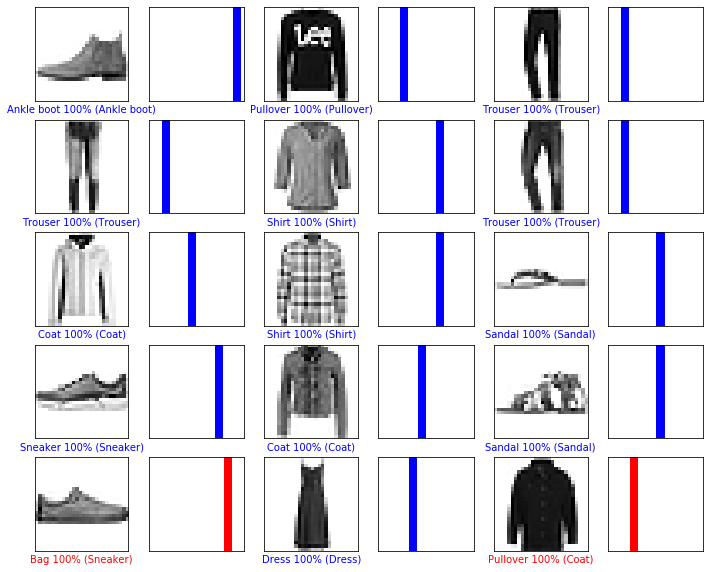

In [36]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()